In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Step 1: Load the Dataset
# Load the dataset and inspect the data
api_results_path = './lovoo_v3_users_api-results.csv'
api_results_df = pd.read_csv(api_results_path)
print("Dataset Loaded")
api_results_df.info()  # To understand the data structure and missing values

Dataset Loaded
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3992 non-null   object 
 1   genderLooking           3992 non-null   object 
 2   age                     3992 non-null   int64  
 3   name                    3992 non-null   object 
 4   counts_details          3992 non-null   float64
 5   counts_pictures         3992 non-null   int64  
 6   counts_profileVisits    3992 non-null   int64  
 7   counts_kisses           3992 non-null   int64  
 8   counts_fans             3992 non-null   int64  
 9   counts_g                3992 non-null   int64  
 10  flirtInterests_chat     3992 non-null   bool   
 11  flirtInterests_friends  3992 non-null   bool   
 12  flirtInterests_date     3992 non-null   bool   
 13  country                 3992 non-null   object 
 14  city                    3


Descriptive Statistics for Key Features:
                Feature         Mean  Median  Mode
0                   age    21.991483    22.0    22
1  counts_profileVisits  3705.467184  1222.0     0
2         counts_kisses   156.599699    44.0     0


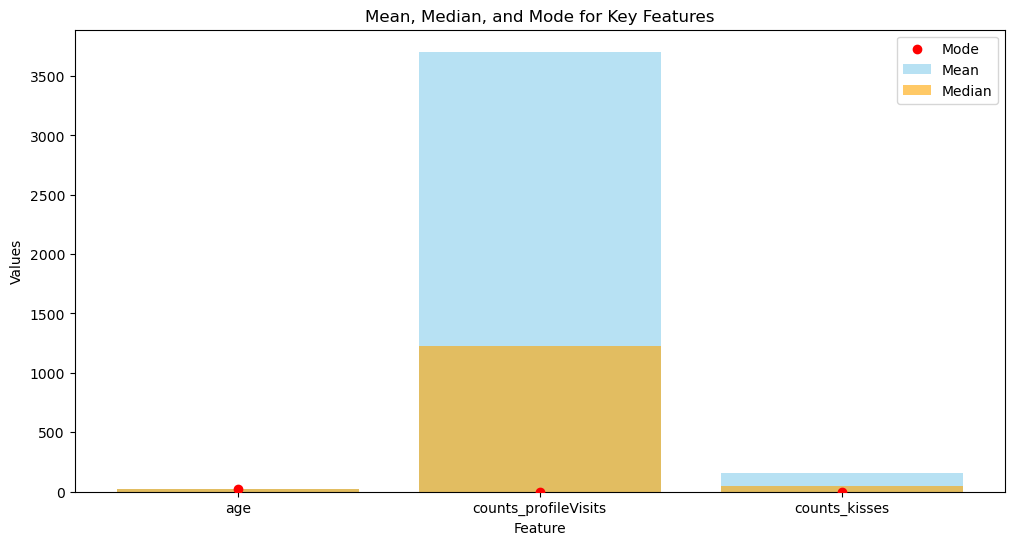


Dispersion Statistics:
                Feature         Mean  Median  Mode      Variance  \
0                   age    21.991483    22.0    22  3.839567e+00   
1  counts_profileVisits  3705.467184  1222.0     0  4.685455e+07   
2         counts_kisses   156.599699    44.0     0  1.426200e+05   

   Standard Deviation  Interquartile Range (IQR)  
0            1.959481                       4.00  
1         6845.038330                    3680.25  
2          377.650691                     130.00  


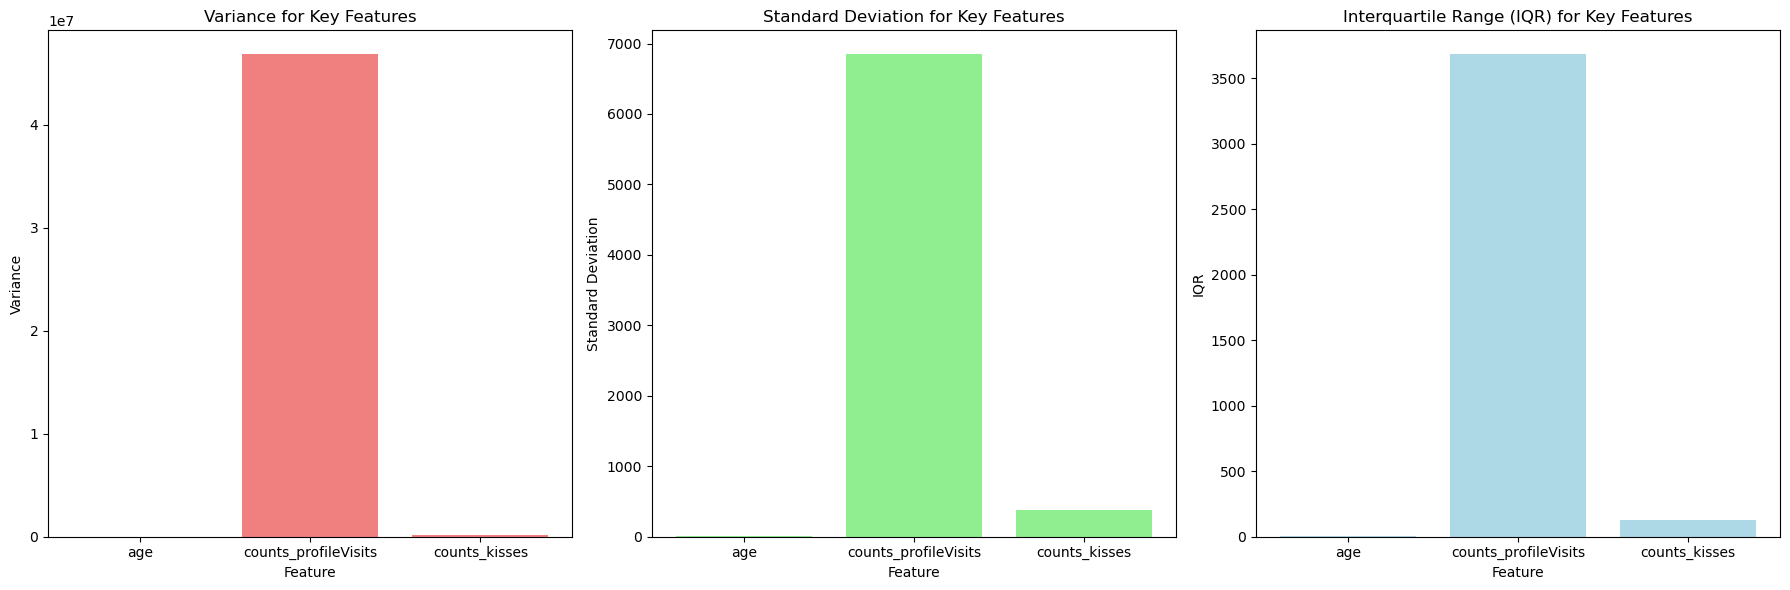

In [15]:
# Step 2: Descriptive Statistics
# Central Tendency: Mean, Median, Mode for features like age, counts_profileVisits, counts_kisses
print("\nDescriptive Statistics for Key Features:")
descriptive_stats = {
    'Feature': ['age', 'counts_profileVisits', 'counts_kisses'],
    'Mean': [
        api_results_df['age'].mean(),
        api_results_df['counts_profileVisits'].mean(),
        api_results_df['counts_kisses'].mean()
    ],
    'Median': [
        api_results_df['age'].median(),
        api_results_df['counts_profileVisits'].median(),
        api_results_df['counts_kisses'].median()
    ],
    'Mode': [
        api_results_df['age'].mode()[0],
        api_results_df['counts_profileVisits'].mode()[0],
        api_results_df['counts_kisses'].mode()[0]
    ]
}

descriptive_stats_df = pd.DataFrame(descriptive_stats)
print(descriptive_stats_df)

# Visualize Central Tendency
plt.figure(figsize=(12, 6))
plt.bar(descriptive_stats_df['Feature'], descriptive_stats_df['Mean'], color='skyblue', alpha=0.6, label='Mean')
plt.bar(descriptive_stats_df['Feature'], descriptive_stats_df['Median'], color='orange', alpha=0.6, label='Median')
plt.scatter(descriptive_stats_df['Feature'], descriptive_stats_df['Mode'], color='red', label='Mode', zorder=5)
plt.xlabel('Feature')
plt.ylabel('Values')
plt.title('Mean, Median, and Mode for Key Features')
plt.legend()
plt.show()

# Dispersion: Variance, Standard Deviation, Interquartile Range (IQR)
print("\nDispersion Statistics:")
descriptive_stats.update({
    'Variance': [
        api_results_df['age'].var(),
        api_results_df['counts_profileVisits'].var(),
        api_results_df['counts_kisses'].var()
    ],
    'Standard Deviation': [
        api_results_df['age'].std(),
        api_results_df['counts_profileVisits'].std(),
        api_results_df['counts_kisses'].std()
    ],
    'Interquartile Range (IQR)': [
        api_results_df['age'].quantile(0.75) - api_results_df['age'].quantile(0.25),
        api_results_df['counts_profileVisits'].quantile(0.75) - api_results_df['counts_profileVisits'].quantile(0.25),
        api_results_df['counts_kisses'].quantile(0.75) - api_results_df['counts_kisses'].quantile(0.25)
    ]
})

descriptive_stats_df = pd.DataFrame(descriptive_stats)
print(descriptive_stats_df)

# Visualize Dispersion Statistics
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].bar(descriptive_stats_df['Feature'], descriptive_stats_df['Variance'], color='lightcoral')
ax[0].set_title('Variance for Key Features')
ax[0].set_xlabel('Feature')
ax[0].set_ylabel('Variance')

ax[1].bar(descriptive_stats_df['Feature'], descriptive_stats_df['Standard Deviation'], color='lightgreen')
ax[1].set_title('Standard Deviation for Key Features')
ax[1].set_xlabel('Feature')
ax[1].set_ylabel('Standard Deviation')

ax[2].bar(descriptive_stats_df['Feature'], descriptive_stats_df['Interquartile Range (IQR)'], color='lightblue')
ax[2].set_title('Interquartile Range (IQR) for Key Features')
ax[2].set_xlabel('Feature')
ax[2].set_ylabel('IQR')

plt.tight_layout()
plt.show()

In [16]:
# Step 3: Hypothesis Testing
# T-test: Comparing counts_profileVisits for isVip vs. non-VIP users
vip_visits = api_results_df[api_results_df['isVip'] == 1]['counts_profileVisits']
non_vip_visits = api_results_df[api_results_df['isVip'] == 0]['counts_profileVisits']

t_stat, p_value = stats.ttest_ind(vip_visits, non_vip_visits, equal_var=False)
print("\nT-Test Results for isVip vs. Non-VIP (counts_profileVisits):")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# ANOVA: Comparing counts_kisses across flirtInterests categories (chat, friends, date)
flirt_chat = api_results_df[api_results_df['flirtInterests_chat'] == True]['counts_kisses']
flirt_friends = api_results_df[api_results_df['flirtInterests_friends'] == True]['counts_kisses']
flirt_date = api_results_df[api_results_df['flirtInterests_date'] == True]['counts_kisses']

anova_stat, anova_p_value = stats.f_oneway(flirt_chat, flirt_friends, flirt_date)
print("\nANOVA Results for flirtInterests categories (counts_kisses):")
print(f"F-statistic: {anova_stat}, P-value: {anova_p_value}")

# Chi-Square Test: Independence between isVerified and isVip
contingency_table = pd.crosstab(api_results_df['verified'], api_results_df['isVip'])
chi2_stat, chi2_p_value, _, _ = stats.chi2_contingency(contingency_table)
print("\nChi-Square Test Results for isVerified vs. isVip:")
print(f"Chi-square statistic: {chi2_stat}, P-value: {chi2_p_value}")


T-Test Results for isVip vs. Non-VIP (counts_profileVisits):
T-statistic: 1.6296889705846462, P-value: 0.10652488419767096

ANOVA Results for flirtInterests categories (counts_kisses):
F-statistic: 1.9506238333895647, P-value: 0.14226794405016174

Chi-Square Test Results for isVerified vs. isVip:
Chi-square statistic: 13.753282685680546, P-value: 0.00020845620752486606


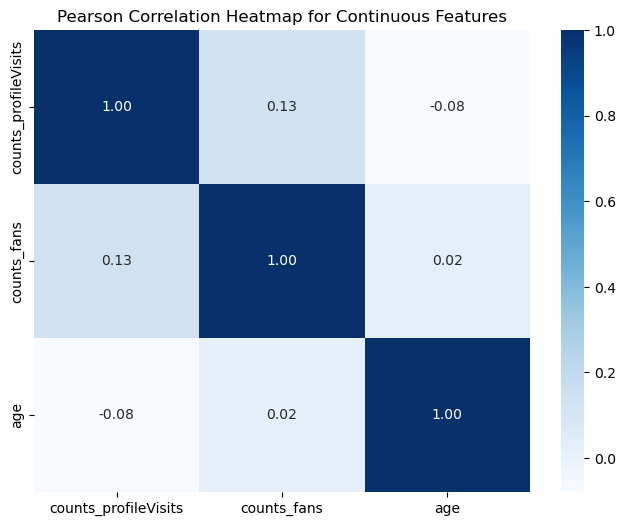

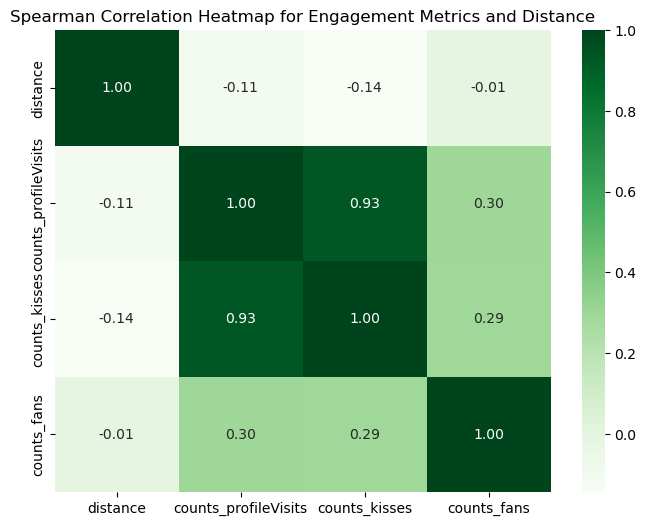

In [17]:
# Step 4: Correlation Analysis
# Pearson Correlation: Continuous features like counts_profileVisits, counts_fans, and age
pearson_corr_features = ['counts_profileVisits', 'counts_fans', 'age']
pearson_corr_matrix = api_results_df[pearson_corr_features].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Pearson Correlation Heatmap for Continuous Features')
plt.show()

# Spearman Correlation: Non-linear or ordinal relationships, such as distance and engagement metrics
spearman_corr_features = ['distance', 'counts_profileVisits', 'counts_kisses', 'counts_fans']
spearman_corr_matrix = api_results_df[spearman_corr_features].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='Greens', fmt='.2f')
plt.title('Spearman Correlation Heatmap for Engagement Metrics and Distance')
plt.show()

In [18]:
# Step 5: Data Preprocessing for Clustering
# Selecting features for clustering: engagement metrics and profile characteristics
clustering_features = ['counts_profileVisits', 'counts_fans', 'counts_kisses', 'distance', 'counts_pictures']
clustering_data = api_results_df[clustering_features].dropna()  # Drop rows with missing values for clustering

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)
print("Data Standardized")

Data Standardized


c:\Users\ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

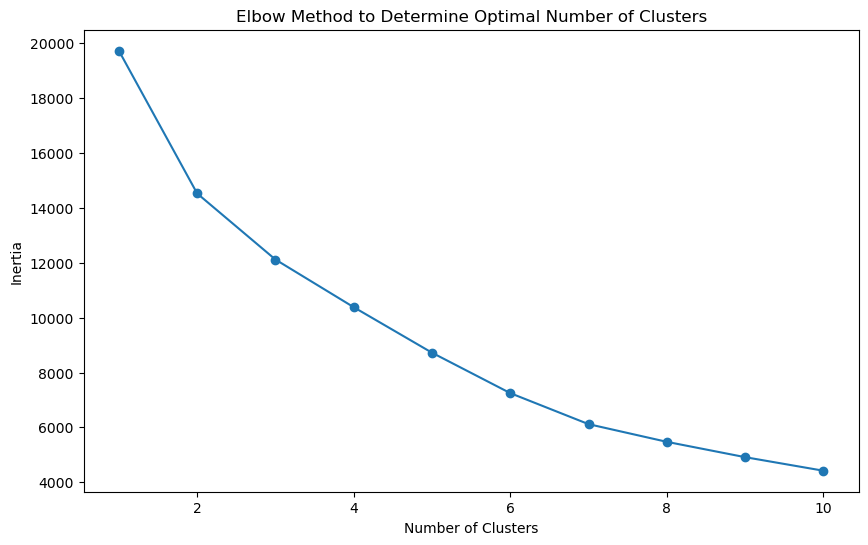

In [19]:
# Step 6: Determine Optimal Number of Clusters (Elbow Method)
inertia_values = []
range_values = range(1, 11)

for k in range_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Visualize the Elbow Method to determine the best number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

In [20]:
# Step 7: Apply K-Means Clustering with Optimal Clusters
# Based on the elbow method, we choose 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
print("K-Means Clustering Applied")

c:\Users\ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Clustering Applied


In [21]:
# Step 8: Adding Cluster Labels to the Dataset
clustering_data['Cluster'] = kmeans_labels
print("Cluster Labels Added to DataFrame")

Cluster Labels Added to DataFrame


In [22]:
# Step 9: Visualize Clustering Results Using PCA
# Apply PCA to reduce dimensions to visualize the clusters
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

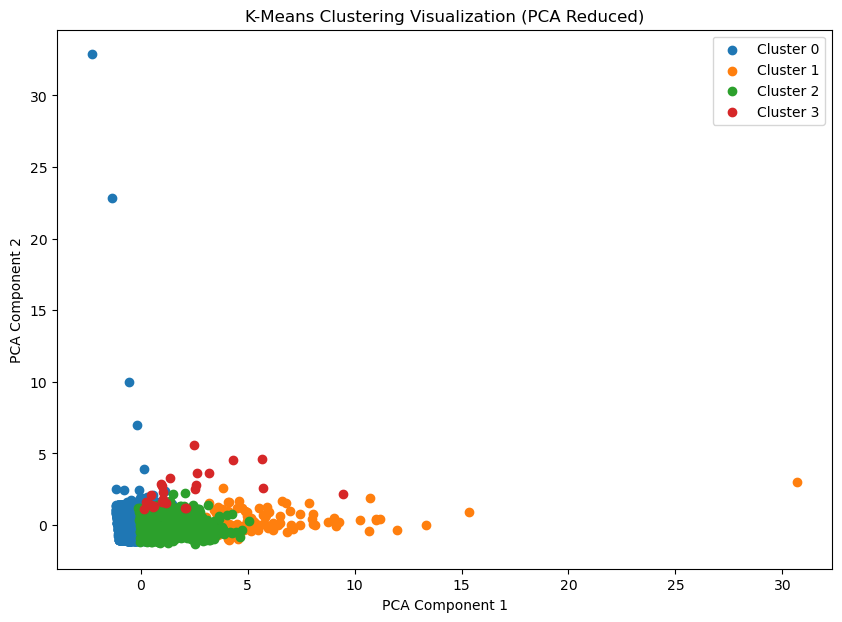

Cluster Summary Statistics:
         counts_profileVisits  counts_fans  counts_kisses    distance  \
Cluster                                                                 
0                 1757.818866     0.979317      65.430586  215.489251   
1                31131.967480     9.333333    1662.731707  189.955285   
2                 8333.942339     3.085667     324.423394  167.683031   
3                 5309.320000   126.440000     274.840000  198.212000   

         counts_pictures  
Cluster                   
0               3.274835  
1              10.967480  
2              11.332784  
3               5.400000  


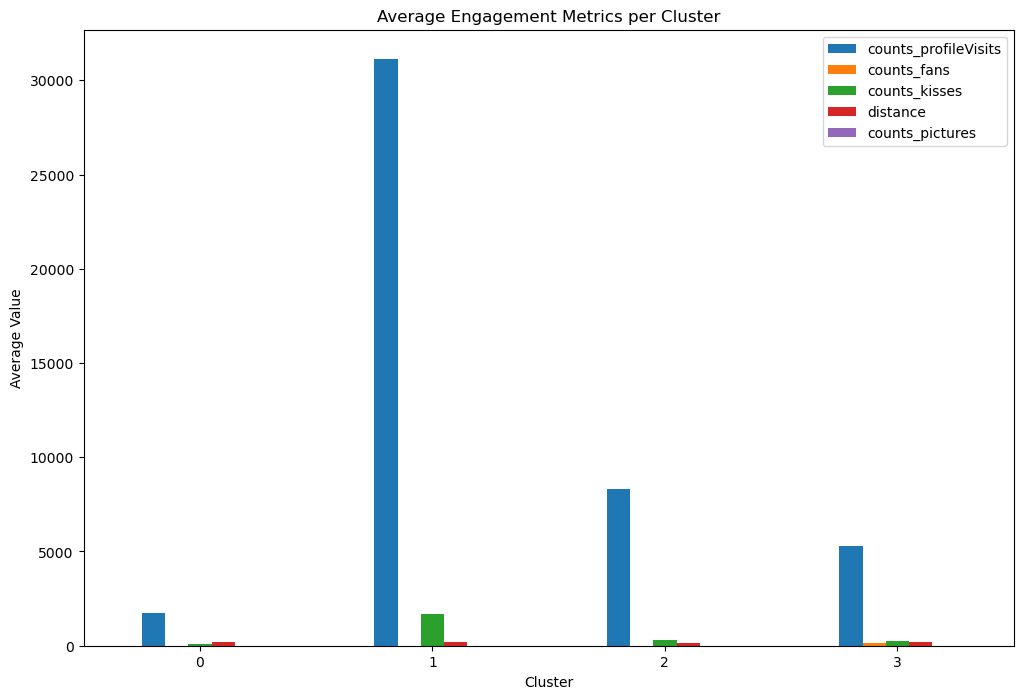

In [23]:
# Plot clusters using the PCA components
plt.figure(figsize=(10, 7))
for cluster in np.unique(kmeans_labels):
    plt.scatter(pca_data[kmeans_labels == cluster, 0], pca_data[kmeans_labels == cluster, 1], label=f'Cluster {cluster}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualization (PCA Reduced)')
plt.legend()
plt.show()

# Step 10: Analyzing the Clusters
# Descriptive statistics for each cluster
cluster_summary = clustering_data.groupby('Cluster').mean()
print("Cluster Summary Statistics:")
print(cluster_summary)

# Visualize average engagement metrics for each cluster
cluster_summary.plot(kind='bar', figsize=(12, 8))
plt.title('Average Engagement Metrics per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()



Applying Linear Regression Model

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 11884676.47995093
R-squared (R2 Score): 0.8663905862249267


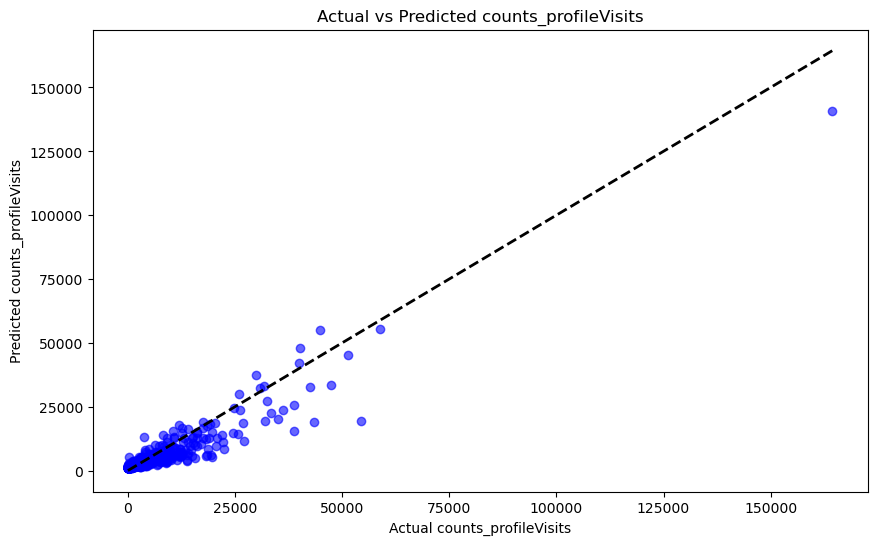

In [24]:
# Step 11: Apply Linear Regression Model
# Predicting 'counts_profileVisits' based on other features
print("\nApplying Linear Regression Model")
X = api_results_df[['age', 'counts_kisses', 'distance', 'counts_fans']]  # Features
y = api_results_df['counts_profileVisits']  # Target variable

# Handling missing values by dropping rows with NaNs in selected features or target
data = pd.concat([X, y], axis=1).dropna()
X = data[['age', 'counts_kisses', 'distance', 'counts_fans']]
y = data['counts_profileVisits']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Making predictions
y_pred = linear_reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")

# Visualizing Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual counts_profileVisits')
plt.ylabel('Predicted counts_profileVisits')
plt.title('Actual vs Predicted counts_profileVisits')
plt.show()